In [8]:
# Importing required libraries
import pandas as pd
from pycaret.regression import *
import seaborn as sns


In [9]:
# Loading the dataset
data = pd.read_excel("TG_T_CashValues_Rel (2).xlsx")
# Encoding the Gender column into numerical format
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})
# Displaying the first few rows of the processed data for verification
print(data.head())



   Gender  Age  Dur        PPV
0       1    0   20  15.198437
1       1    0   21  15.741015
2       1    0   22  16.267189
3       1    0   23  16.777448
4       1    0   24  17.272269


In [11]:
data.shape

(5270, 4)

In [12]:
data.dtypes

Gender      int64
Age         int64
Dur         int64
PPV       float64
dtype: object

In [13]:
data.duplicated().sum()
#عشان اشوف السطور المكررة اذا في مكرر بحذف

0

In [14]:
data.isnull().sum()

Gender    0
Age       0
Dur       0
PPV       0
dtype: int64

In [15]:
data.isna().sum()
#done clean

Gender    0
Age       0
Dur       0
PPV       0
dtype: int64

In [52]:
# Example: Dropping rows with missing target values
data.dropna(subset=['PPV'], inplace=True)


In [53]:
# Dropping duplicate rows
data.drop_duplicates(inplace=True)


<Axes: xlabel='Age', ylabel='Count'>

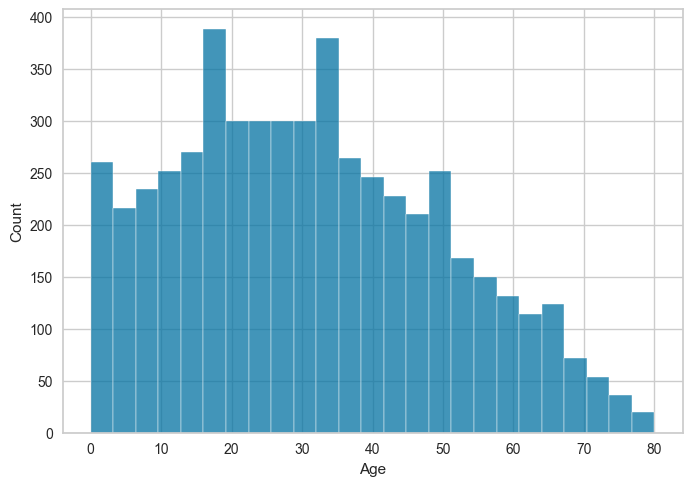

In [21]:
sns.histplot(data=data,x="Age")


<Axes: xlabel='Dur', ylabel='Count'>

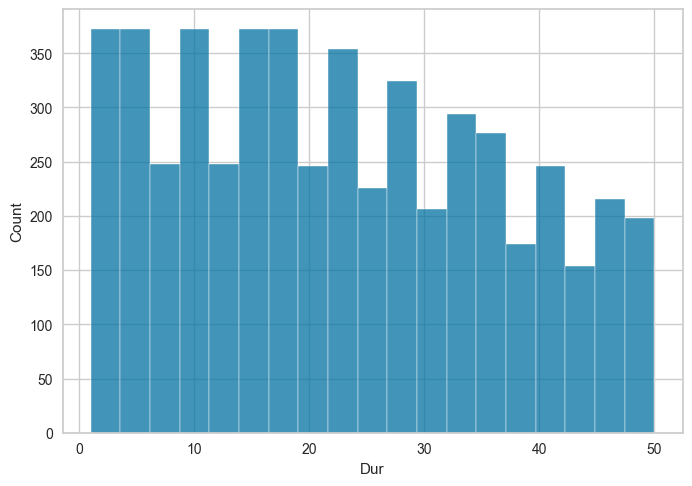

In [41]:
sns.histplot(data=data,x="Dur")

<Axes: xlabel='Age', ylabel='Density'>

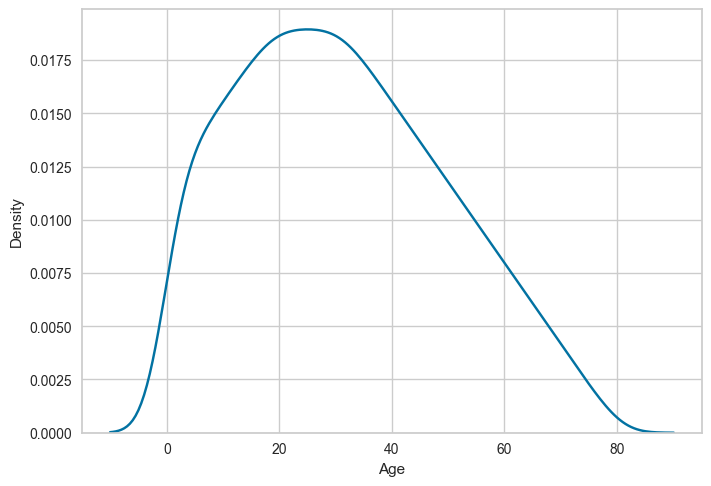

In [46]:
sns.kdeplot(data=data,x="Age")

<Axes: xlabel='Gender', ylabel='Age'>

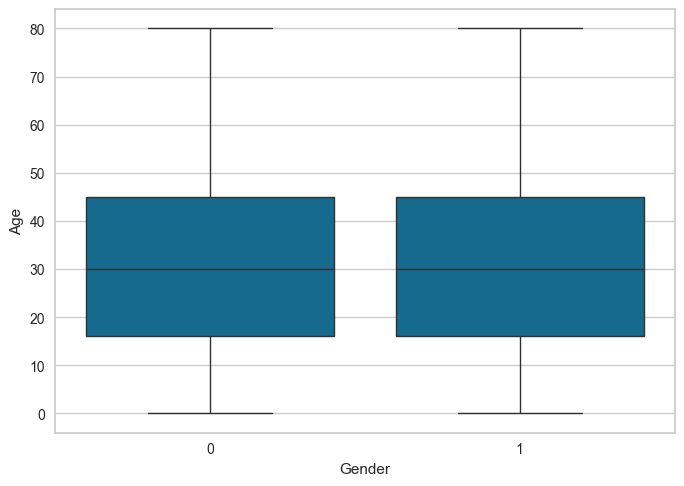

In [66]:
sns.boxplot(data=data, x="Gender", y="Age")


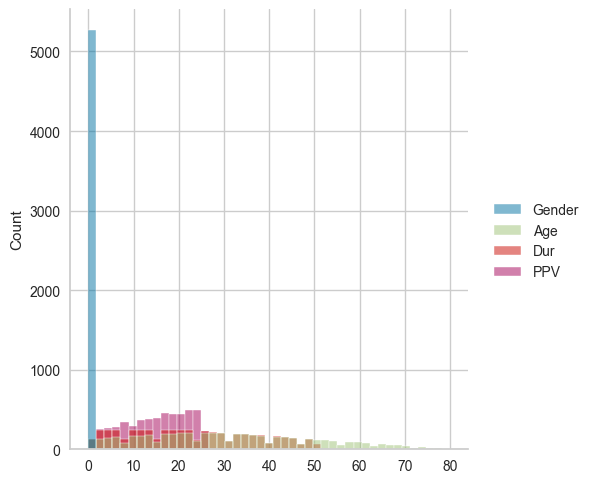

In [48]:
sns.displot(data=data)

<Axes: xlabel='Gender', ylabel='Age'>

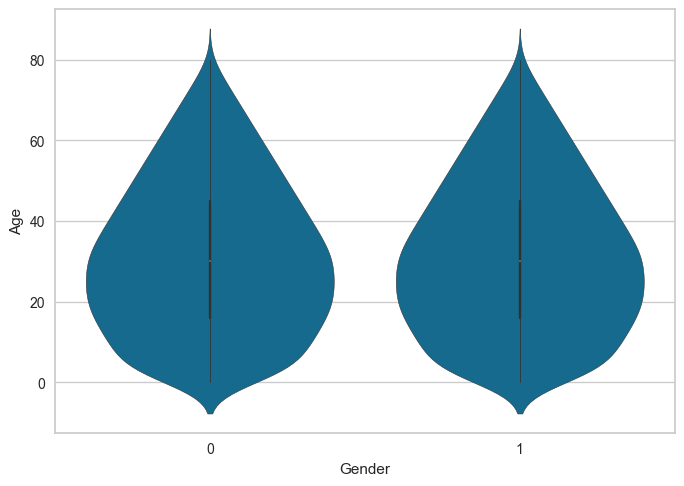

In [67]:
sns.violinplot(data=data, x="Gender", y="Age")


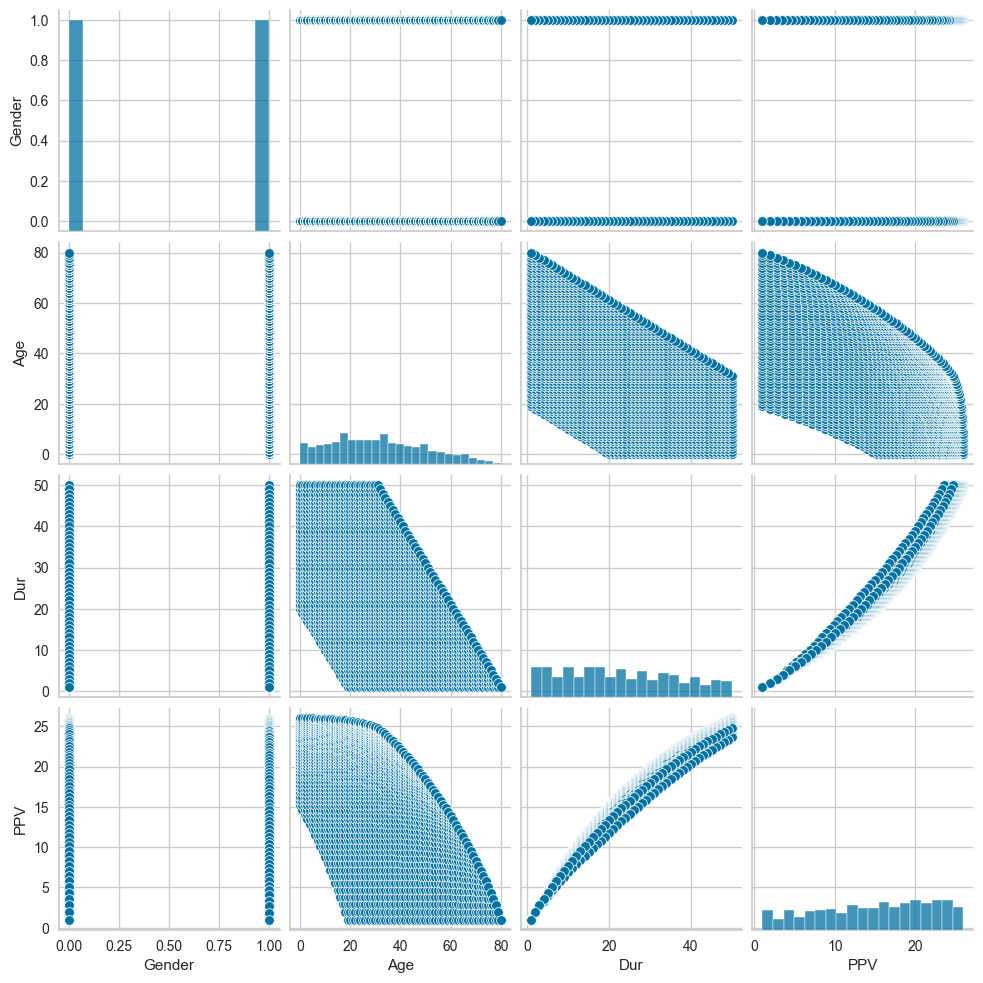

In [68]:
sns.pairplot(data)


In [44]:
# Checking the correlation between features and the target variable
print(data.corr())
# Defining predictors (independent variables) and target variable
X = data[['Gender', 'Age', 'Dur']]  # Features
y = data['PPV']  # Target


              Gender           Age           Dur       PPV
Gender  1.000000e+00 -5.839480e-16 -4.498407e-15 -0.019844
Age    -5.839480e-16  1.000000e+00 -5.072426e-01 -0.565087
Dur    -4.498407e-15 -5.072426e-01  1.000000e+00  0.978774
PPV    -1.984397e-02 -5.650867e-01  9.787742e-01  1.000000


In [25]:
# Importing PyCaret for regression tasks
# Setting up the PyCaret environment
regression_setup = setup(
    data=data,
    target='PPV',  # Target variable
    numeric_features=['Age', 'Dur','Gender'],  # Numerical features
    normalize=True,  # Normalize data for better performance
    session_id=42  # Random seed for reproducibility
)


,Description,Value
0,Session id,42
1,Target,PPV
2,Target type,Regression
3,Original data shape,"(5270, 4)"
4,Transformed data shape,"(5270, 4)"
5,Transformed train set shape,"(3688, 4)"
6,Transformed test set shape,"(1582, 4)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple


In [50]:
# Comparing all regression models and selecting the best one
best_model = compare_models(sort="R2")
# Displaying the best model for analysis
print(best_model)


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,00:10:38
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0104,0.0010,0.0297,1.0000,0.0023,0.0008,0.0920
rf,Random Forest Regressor,0.0379,0.0047,0.0683,0.9999,0.0052,0.0029,0.1040
lightgbm,Light Gradient Boosting Machine,0.0366,0.0050,0.0707,0.9999,0.0049,0.0029,0.1050
dt,Decision Tree Regressor,0.0537,0.0102,0.1007,0.9998,0.0067,0.0037,0.0140
gbr,Gradient Boosting Regressor,0.0814,0.0186,0.1358,0.9996,0.0119,0.0084,0.0460
knn,K Neighbors Regressor,0.1239,0.0312,0.1765,0.9994,0.0451,0.0273,0.0180
ada,AdaBoost Regressor,0.5601,0.4409,0.6636,0.9911,0.0984,0.0797,0.0460
lar,Least Angle Regression,1.1098,1.7689,1.3290,0.9645,0.1957,0.1852,0.0120
br,Bayesian Ridge,1.1098,1.7689,1.3290,0.9645,0.1958,0.1853,0.0120
ridge,Ridge Regression,1.1098,1.7689,1.3290,0.9645,0.1959,0.1854,0.0140


ExtraTreesRegressor(n_jobs=-1, random_state=42)


In [51]:
# Comparing all regression models and selecting the best one
best_model = compare_models(sort="RMSE")
# Displaying the best model for analysis
print(best_model)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,00:12:53
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0104,0.0010,0.0297,1.0000,0.0023,0.0008,0.0940
rf,Random Forest Regressor,0.0379,0.0047,0.0683,0.9999,0.0052,0.0029,0.1050
lightgbm,Light Gradient Boosting Machine,0.0366,0.0050,0.0707,0.9999,0.0049,0.0029,0.1380
dt,Decision Tree Regressor,0.0537,0.0102,0.1007,0.9998,0.0067,0.0037,0.0140
gbr,Gradient Boosting Regressor,0.0814,0.0186,0.1358,0.9996,0.0119,0.0084,0.0470
knn,K Neighbors Regressor,0.1239,0.0312,0.1765,0.9994,0.0451,0.0273,0.0180
ada,AdaBoost Regressor,0.5601,0.4409,0.6636,0.9911,0.0984,0.0797,0.0490
lar,Least Angle Regression,1.1098,1.7689,1.3290,0.9645,0.1957,0.1852,0.0120
br,Bayesian Ridge,1.1098,1.7689,1.3290,0.9645,0.1958,0.1853,0.0130
ridge,Ridge Regression,1.1098,1.7689,1.3290,0.9645,0.1959,0.1854,0.0130


ExtraTreesRegressor(n_jobs=-1, random_state=42)


In [27]:
# Tuning the best model's hyperparameters
tuned_model = tune_model(best_model)
# Displaying the tuned model for verification
print(tuned_model)


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,22:33:52
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3664,0.2582,0.5081,0.9948,0.0528,0.0453
1,0.3668,0.2271,0.4766,0.9950,0.0450,0.0376
2,0.3820,0.2859,0.5347,0.9938,0.0462,0.0376
3,0.4457,0.3355,0.5792,0.9933,0.0566,0.0488
4,0.3730,0.2379,0.4877,0.9958,0.0513,0.0433
5,0.3848,0.2857,0.5345,0.9940,0.0518,0.0435
6,0.3962,0.2866,0.5353,0.9941,0.0525,0.0440
7,0.3931,0.2683,0.5180,0.9948,0.0553,0.0479
8,0.3663,0.2303,0.4799,0.9953,0.0468,0.0401


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
ExtraTreesRegressor(n_jobs=-1, random_state=42)


In [37]:
evaluate_model(tuned_model)



interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [65]:
# تنفيذ Cross-Validation وتقييم النموذج باستخدام مقاييس مختلفة
evaluate_model(tuned_model)




interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [63]:
from sklearn.model_selection import cross_val_score

# Performing Cross-Validation with the tuned model
cv_scores = cross_val_score(tuned_model, X, y, cv=5)  # cv=5 means 5-fold cross-validation

# Displaying Cross-Validation results
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Score: {cv_scores.mean()}")
print(f"Standard Deviation of Cross-Validation Scores: {cv_scores.std()}")


Cross-Validation Scores: [0.99675209 0.9949769  0.99585739 0.99909138 0.99579445]
Mean Cross-Validation Score: 0.996494440360664
Standard Deviation of Cross-Validation Scores: 0.0014148655376077538


In [62]:
save_model(tuned_model,'best_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Age', 'Dur', 'Gender'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('normalize', TransformerWrapper(transformer=StandardScaler())),
                 ('trained_model',
                  ExtraTreesRegressor(n_jobs=-1, random_state=42))]),
 'best_model.pkl')

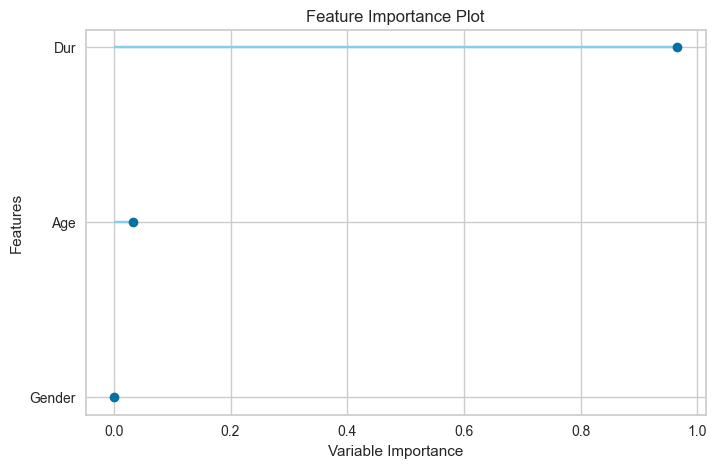

In [60]:
# Plotting feature importance (if the model supports it)
plot_model(tuned_model, plot='feature')
